# DOA estimation using MUSIC with a uniform linear array

In [1]:
import numpy as np
import doatools.model as model
import doatools.estimation as estimation
import doatools.plotting as doaplot
from mmwave import dsp

import matplotlib.pyplot as plt
%matplotlib inline

Estimates: [-0.78539816 -0.40142573  0.          0.40142573  0.78539816]
Ground truth: [-0.78539816 -0.39269908  0.          0.39269908  0.78539816]


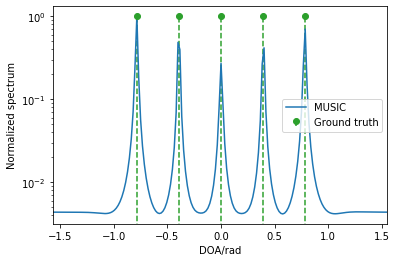

In [2]:
np.random.seed(128)

# Parameters
wavelength = 1.0 # Normalized wavelength. Recall that d0 = wavelength / 2.
d0 = wavelength / 2
power_source = 1.0
power_noise = 1.0 # SNR = 0 dB
n_snapshots = 100

# Create a 12-element ULA
ula = model.UniformLinearArray(12, d0)

# Place 7 far-field narrow-band sources uniformly between (-pi/4, pi/4)
sources = model.FarField1DSourcePlacement(np.linspace(-np.pi/4, np.pi/4, 5))

# Use the stochastic signal model.
source_signal = model.ComplexStochasticSignal(sources.size, power_source)
noise_signal = model.ComplexStochasticSignal(ula.size, power_noise)

# Get the estimated covariance matrix.
_, R = model.get_narrowband_snapshots(ula, sources, wavelength, source_signal, noise_signal,
                                      n_snapshots, return_covariance=True)

# Create a MUSIC-based estimator.
grid = estimation.FarField1DSearchGrid()
estimator = estimation.MUSIC(ula, wavelength, grid)

# Get the estimates.
resolved, estimates, sp = estimator.estimate(R, sources.size, return_spectrum=True)
print('Estimates: {0}'.format(estimates.locations))
print('Ground truth: {0}'.format(sources.locations))

# Plot the MUSIC-spectrum.
doaplot.plot_spectrum({'MUSIC': sp}, grid, ground_truth=sources, use_log_scale=True);

(8, 128)
(180,)
Estimates: [-0.78539816 -0.40142573  0.          0.40142573  0.76794487]
Ground truth: [-0.78539816 -0.39269908  0.          0.39269908  0.78539816]


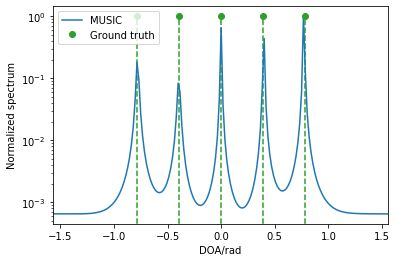

In [3]:
np.random.seed(128)

# Parameters
wavelength = 1.0 # Normalized wavelength. Recall that d0 = wavelength / 2.
d0 = wavelength / 2
power_source = 1.0
power_noise = 1.0 # SNR = 0 dB
n_snapshots = 128

# Create a 8-element ULA
ula = model.UniformLinearArray(8, d0)

# Place 5 far-field narrow-band sources uniformly between (-pi/4, pi/4)
sources = model.FarField1DSourcePlacement(np.linspace(-np.pi/4, np.pi/4, 5))

# Use the stochastic signal model.
source_signal = model.ComplexStochasticSignal(sources.size, power_source)
noise_signal = model.ComplexStochasticSignal(ula.size, power_noise)

# Get the estimated covariance matrix.
snapshots, R = model.get_narrowband_snapshots(ula, sources, wavelength, source_signal, noise_signal,
                                      n_snapshots, return_covariance=True)

print(snapshots.shape)

# Create a MUSIC-based estimator.
grid = estimation.FarField1DSearchGrid()
estimator = estimation.MUSIC(ula, wavelength, grid)

# Get the estimates.
resolved, estimates, sp = estimator.estimate(R, sources.size, return_spectrum=True)
print(sp.shape)
print('Estimates: {0}'.format(estimates.locations))
print('Ground truth: {0}'.format(sources.locations))

# Plot the MUSIC-spectrum.
doaplot.plot_spectrum({'MUSIC': sp}, grid, ground_truth=sources, use_log_scale=True);

In [4]:
steering_vector = dsp.gen_steering_vec(90, 1, 8)
spectrum = dsp.aoa_music(steering_vector, snapshots.T, 5)

AttributeError: 'list' object has no attribute 'shape'